In [37]:
import numpy as np 
import pandas as pd 

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math

In [38]:
df_train = pd.read_csv('train.csv')
df_valid = pd.read_csv('validation.csv')
# df_test = pd.read_csv('test.csv')

In [39]:
var_columns = [c for c in df_train.columns if c not in ['profit_margin']]

x_train = df_train.loc[:,var_columns]
y_train = df_train.loc[:,'profit_margin']

x_valid = df_valid.loc[:,var_columns]
y_valid = df_valid.loc[:,'profit_margin']


In [67]:
# baseline
gbModel_baseline = GradientBoostingRegressor()
gbModel_baseline.fit(x_train, y_train)
y_pred_base = gbModel_baseline.predict(x_valid)

y_actual = df_valid['profit_margin'].to_numpy()

results = pd.DataFrame({"predicted":y_pred_base, "actual":y_actual}).sort_values('actual')
num_neg = 0
for i in results['predicted']:
    if i < 0:
        num_neg += 1
print(num_neg)
# print(results.to_string())

MSE = mean_squared_error(y_actual, y_pred_base)
print(f'Baseline MSE: {MSE}')

RMSE = math.sqrt(MSE)
print(f'Baseline RMSE: {RMSE}')

MAE = mean_absolute_error(y_actual, y_pred_base)
print(f'Baseline MAE: {MAE}')

0
Baseline MSE: 0.3688243926925913
Baseline RMSE: 0.6073091409591916
Baseline MAE: 0.4800943321277423


In [62]:
# changed
gbModel = GradientBoostingRegressor(random_state=42, loss='huber', learning_rate=0.01, n_estimators=3000)
gbModel.fit(x_train, y_train)
y_pred_changed = gbModel.predict(x_valid)

y_actual = df_valid['profit_margin'].to_numpy()

results = pd.DataFrame({"predicted":y_pred_changed, "actual":y_actual}).sort_values('actual')
num_neg = 0
counter = 0
for i in results['predicted']:
    if i < 0:
        num_neg += 1
        results.at[0, 'predicted'] = 0
print(num_neg)
# print(results.to_string())

MSE = mean_squared_error(y_actual, y_pred_changed)
print(f'Changed MSE: {MSE}')

RMSE = math.sqrt(MSE)
print(f'Changed RMSE: {RMSE}')

MAE = mean_absolute_error(y_actual, y_pred_changed)
print(f'Changed MAE: {MAE}')

1
Changed MSE: 0.3618727489862062
Changed RMSE: 0.6015585997940734
Changed MAE: 0.4643988522696266


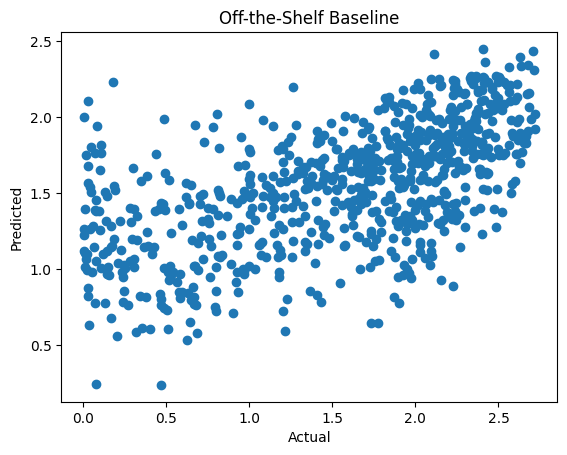

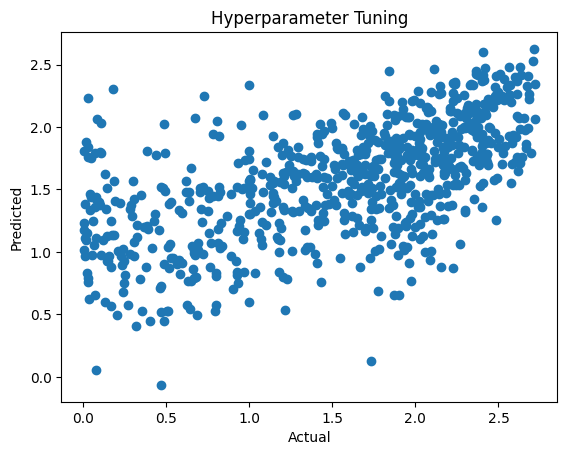

In [78]:
import matplotlib.pyplot as plt
plt.scatter(y_actual, y_pred_base)
plt.title("Off-the-Shelf Baseline")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig('cs235_midterm_gbm_base.png')
plt.show()

plt.scatter(y_actual, y_pred_changed)
plt.title("Hyperparameter Tuning")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig('cs235_midterm_gbm_tuned.png')
plt.show()

In [42]:
features_importance  = pd.DataFrame({'Variable_Name':var_columns, 'Importance':gbModel.feature_importances_}).sort_values('Importance', ascending=False)

print(features_importance.to_string())

              Variable_Name  Importance
4                vote_count    0.345514
1                    budget    0.342738
3              vote_average    0.073000
0                popularity    0.049373
2                   runtime    0.029650
40           genres: Comedy    0.019143
25            genres: Drama    0.010841
71     original_language_zh    0.010681
47                month: 09    0.009436
60     original_language_fr    0.009374
38  genres: Science Fiction    0.007370
39           genres: Horror    0.006664
31          genres: Fantasy    0.005442
61     original_language_hi    0.004329
37           genres: Family    0.004111
62     original_language_it    0.003321
36           genres: Action    0.003286
55                month: 06    0.003167
26         genres: Thriller    0.003122
50                month: 03    0.003120
69     original_language_te    0.002780
58     original_language_en    0.002652
64     original_language_ko    0.002566
49                month: 07    0.002539


In [73]:
from sklearn.model_selection import cross_val_score, KFold

n_folds = 5

kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

base_scores = cross_val_score(gbModel_baseline, x_valid, y_valid, cv=kf)
base_mean_score = base_scores.mean()
print('Baseline Mean Cross-validation Score: ', base_mean_score)

scores = cross_val_score(gbModel, x_valid, y_valid, cv=kf)
mean_score = scores.mean()
print('Modifications Mean Cross-validation Score: ', mean_score)

Baseline Mean Cross-validation Score:  0.2590357623141565
Modifications Mean Cross-validation Score:  0.20215623724552242


In [ ]:
print(base_scores)
print(scores)

[0.18089586 0.15691691 0.23076606 0.19885137 0.24335099]
